In [314]:
import numpy as np
import pandas as pd


In [315]:
#  csv file will be store in data variable as Data frame 
data = pd.read_csv("insurance.csv")


In [316]:
# This function is used for one-hot encoding categorical variables.
# One-hot encoding is a process of converting categorical data, like text or strings, into binary 
# values (0 and 1) so that it can be provided to machine learning algorithms to improve predictions.
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

In [317]:
# preparing data for a typical machine learning workflow.
# X creates a DataFrame X that contains the independent variables
# Y This line creates a Series y that contains the dependent variable
# You are standardizing the values in your feature matrix "X" by subtracting the mean and dividing by the standard deviation for each column
X = data.drop('charges', axis=1) 
X = (X - X.mean()) / X.std() 
X = np.column_stack((np.ones(X.shape[0]), X))
y = data['charges']  

In [318]:
# To predict a value using the linear equation y = wx + b, you need to provide the equation with its parameters: 
# weights (w), bias (b), and input data (x).
def predict(weights,intercept , X):
    return (np.dot(X, weights) +intercept)

In [319]:
# Gradient Descent Algorithm
# This function performs gradient descent to optimize linear regression coefficients.
# It iteratively updates the weights and intercept to minimize the mean squared error.
# Inputs:
# - X: Input data matrix (features)
# - y: Target values
# - learning_rate: Step size for gradient descent
# - num_iterations: Number of iterations (epochs)
# Output:
# - weights: Optimized coefficients for the features
# - intercept: Optimized intercept term

def gradient_descent(X, y, learning_rate, num_iterations):
    weights = np.zeros(X.shape[1])
    intercept = 0
    for i in range(num_iterations):
        predictions = np.dot(X, weights) + intercept
        error = y - predictions
        gradient = -2 * np.dot(X.T, error) / len(y)
        weights -= learning_rate * gradient 
        intercept -= learning_rate * np.mean(error)  # Update the intercept

    return weights, intercept

In [320]:
# Apply gradient descent to obtain the weights and intercept.
weights,intercept =gradient_descent  (X , y , learning_rate= 0.01 , num_iterations=1000)

In [321]:
# predict  data  by calling function 
y_pred = predict(weights,intercept , X)

In [322]:
# Evaluate the model by# calculated the Mean Squared Error (MSE) and R-squared (R2) score for your linear regression model.

mse = np.mean((y - y_pred) ** 2)
r2 = 1 - (mse / np.var(y))
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 36501894.003335126
R-squared: 0.750913027802418


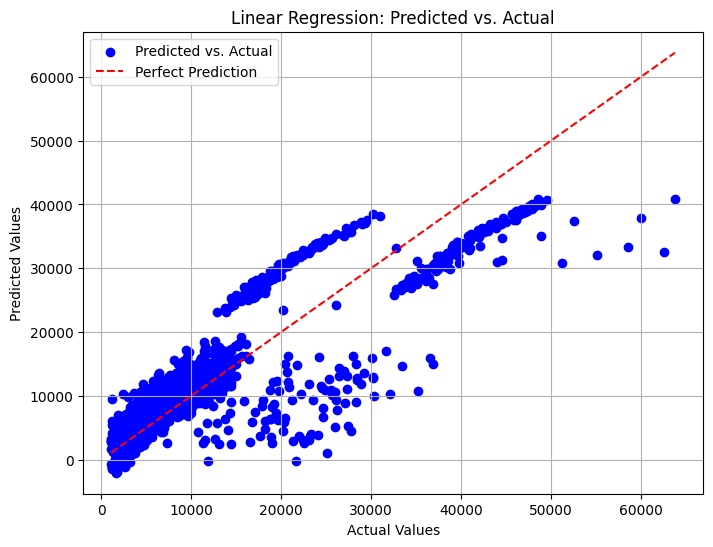

In [323]:
import matplotlib.pyplot as plt


y_pred = y_pred  
y_actual = y  

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_actual, y_pred, c='b', marker='o', label='Predicted vs. Actual')


plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', linestyle='--', label='Perfect Prediction')

# Customize the plot
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Predicted vs. Actual')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [324]:
# Packages used.
    #  numpy , pandas and matplotlib 

# Problem Definition.
    #  implementing linear regression to predict individual medical costs billed by health insurance

# Compare between the results you get using Scikit-learn and Python form scratch implementation.
    # 1 - Scikit-learn:  
        # the Mean Squared Error (MSE): 33596915.85136146
        # R-squared (R2) Score: 0.7835929767120723
    # 2 - scratch implementation
        # Mean Squared Error: 36501894.003335126
        # R-squared: 0.750913027802418
#Scikit-learn is superior to a custom, from-scratch implementation of machine learning models because it offers 
# a range of optimizations and advantages. These optimizations lead to better performance, efficiency, and ease of use
